In [38]:
import pandas as pd
import numpy as np
from scipy import stats
import math

def foldChange(diseased, control):
    return diseased/control

def log2foldChange(foldChange):
    return math.log(foldChange, 2)

dat = pd.read_table('test2.txt', sep='\t')

controls = []
parkinsons = []
columns = list(dat)
for column in columns:
    if column.startswith('C_'):
        controls.append(column)
    elif column.startswith('P_'):
        parkinsons.append(column)

baseMean = []
contExpMeans = []
parExpMeans = []
foldChanges = []
log2foldChanges = []
contStdErrors = []
parStdErrors = []

for i in range(len(dat.index)):
    mean = np.mean(dat.ix[i,2:])
    contExpMean = np.mean(dat[controls].ix[i,:])
    parExpMean = np.mean(dat[parkinsons].ix[i,:])
    foldCh = foldChange(parExpMean, contExpMean)
    log2foldCh = log2foldChange(foldCh)
    contStdErr = stats.sem(dat[controls].ix[i,:])
    parStdErr = stats.sem(dat[parkinsons].ix[i,:])
    contStdErrors.append(contStdErr)
    parStdErrors.append(parStdErr)
    log2foldChanges.append(log2foldCh)
    foldChanges.append(foldCh)
    parExpMeans.append(parExpMean)
    contExpMeans.append(contExpMean)
    baseMean.append(mean)

    

out = {'EnsemblID':dat['EnsemblID'],
       'genes': dat['symbol'],
      'baseMean': baseMean,
      'contExpMean': contExpMeans,
      'parExpMean': parExpMeans,
      'foldCh': foldChanges,
      'log2fCh': log2foldChanges,
      'contSE': contStdErrors,
      'parSE': parStdErrors}

outDF = pd.DataFrame(out, columns=['EnsemblID', 'genes', 'baseMean', 'contExpMean', 'parExpMean', 'foldCh', 'log2fCh',
                                  'contSE', 'parSE'])
sortedOut = outDF.sort_values(by='foldCh', ascending=False)

sortedOut.to_csv('parkOut.txt', sep='\t')

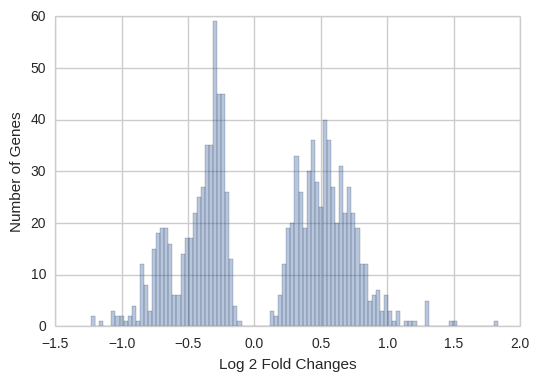

In [7]:
%matplotlib inline
import seaborn as sns
import pandas as pd

datPD = pd.read_table('parkinsonDE.txt')

lowPVal = datPD[datPD['padj'] < 0.05]
sns.set_style('whitegrid')

log2FCData = lowPVal['log2FoldChange']
log2FCPlot = sns.distplot(log2FCData, kde=False, bins=100)

log2FCPlot.set(xlabel='Log 2 Fold Changes', ylabel='Number of Genes')

#ax.set_xtickslabel([-1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0])

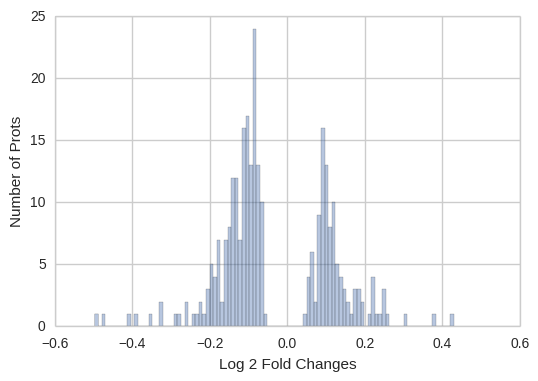

In [8]:
protDatPD = pd.read_table('protPDE.csv')

# print(protDatPD.head())

lowQVal = protDatPD[protDatPD['qvalue'] < 0.05]

#print(lowQVal)

log2FCPData = lowQVal['log2FoldChange']
log2FCPPlot = sns.distplot(log2FCPData, kde=False, bins=100)

log2FCPPlot.set(xlabel='Log 2 Fold Changes', ylabel='Number of Prots')


In [54]:
geneSorted = lowPVal.sort_values(by='log2FoldChange', ascending=False)
topFiveUR = geneSorted.head()
topFiveDR = geneSorted.tail()
topFiveDR

,EnsemblID,symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
44,ENSG00000132130.7,LHX1,44.082944,-1.065873,0.228346,-4.667793,3.044528e-06,0.001189
61,ENSG00000174948.5,GPR149,8.096781,-1.076434,0.238691,-4.509745,6.490550e-06,0.001787
19,ENSG00000008086.6,CDKL5,98.177117,-1.147549,0.221689,-5.176386,2.262252e-07,0.000189
20,ENSG00000145863.6,GABRA6,168.377756,-1.227237,0.236847,-5.181570,2.200256e-07,0.000189
18,ENSG00000086570.8,FAT2,709.721960,-1.230213,0.235039,-5.234071,1.658167e-07,0.000153


In [10]:
datPD['symbol'] = [symbol.upper() for symbol in datPD['symbol']]
protDatPD['symbol'] = [symbol.upper() for symbol in datPD['Symbol']]
lowPVal['symbol'] = [symbol.upper() for symbol in lowPVal['symbol']]
lowQVal['Symbol'] = [symbol.upper() for symbol in lowQVal['Symbol']]

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [11]:
geneNames = list(lowPVal['symbol'])
protNames = list(lowQVal['Symbol'])

intersectGPs = []

for protName in protNames:
    if protName in geneNames:
        intersectGPs.append(protName)

print(intersectGPs)

['ACTA2', 'PRUNE2', 'ALDH1A1', 'SLC4A8', 'CRELD1', 'VAPB', 'GFM1', 'NDUFS1', 'MTX3', 'OPA1']


In [62]:
allGeneNames = list(datPD['symbol'])
allProtNames = list(protDatPD['Symbol'])

allIntersectGPs = []

for allProtName in allProtNames:
    if allProtName in allGeneNames:
        allIntersectGPs.append(allProtName)

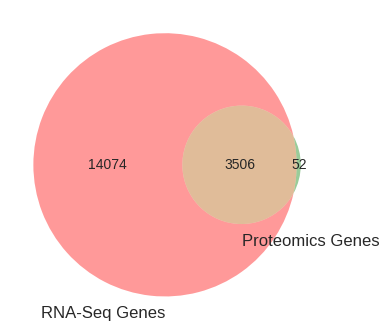

In [71]:
subset = [len(allGeneNames)-len(allIntersectGPs), len(allProtNames)-len(allIntersectGPs),
          len(allIntersectGPs)]

v = venn2(subset, ['RNA-Seq Genes', 'Proteomics Genes'])

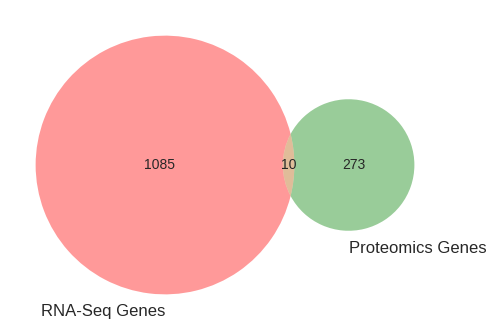

In [69]:
from matplotlib_venn import venn2

subset = [len(geneNames)-len(intersectGPs), len(protNames)-len(intersectGPs), len(intersectGPs)]

v = venn2(subset, ['RNA-Seq Genes', 'Proteomics Genes'])


In [41]:
test = pd.DataFrame({'symbol': [], 'log2FoldChange':[]})

RNASeql2FoldCh = []
protl2FoldCh = []


for intersectGP in intersectGPs:
    RNASeql2FoldCh.append(float(lowPVal['log2FoldChange'][lowPVal['symbol'] == intersectGP]))
    protl2FoldCh.append(float(lowQVal['log2FoldChange'][lowQVal['Symbol'] == intersectGP]))

RNASeqFoldCh = [2**i for i in RNASeql2FoldCh]
protFoldCh = [2**i for i in protl2FoldCh]

GPl2FoldChData = {'symbol': intersectGPs, 'RNASl2FoldCh': RNASeql2FoldCh, 'protl2FoldCh':protl2FoldCh,
                 'RNASeqFoldCh': RNASeqFoldCh, 'protFoldCh':protFoldCh}
GPl2FoldChDF = pd.DataFrame(GPl2FoldChData, columns=['symbol', 'RNASl2FoldCh', 'protl2FoldCh',
                                                     'RNASeqFoldCh', 'protFoldCh'])

GPl2FoldChDF

,symbol,RNASl2FoldCh,protl2FoldCh,RNASeqFoldCh,protFoldCh
0,ACTA2,-0.714480,0.106885,0.609425,1.076901
1,PRUNE2,-0.355359,-0.115702,0.781675,0.922933
2,ALDH1A1,-0.537699,-0.241008,0.688869,0.846154
3,SLC4A8,-0.660308,-0.193625,0.632743,0.874406
4,CRELD1,0.334780,-0.107293,1.261185,0.928328
5,VAPB,-0.219866,-0.097798,0.858645,0.934458
6,GFM1,-0.257380,-0.098431,0.836606,0.934048
7,NDUFS1,-0.354429,-0.103463,0.782179,0.930796
8,MTX3,-0.605690,-0.117924,0.657157,0.921513
9,OPA1,-0.283314,-0.068977,0.821701,0.953314


In [ ]:
lowQVal[['log2FoldChange']][lowQVal['Symbol'] == 'ACTA2']